<a href="https://colab.research.google.com/github/Ludvins/PAC_Bayes_Chernoff_MLL/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import pandas as pd
import os

In [ ]:
uploaded = files.upload()


Saving laplace_ConvNN_all_kron_layerwise_0.0_results.csv to laplace_ConvNN_all_kron_layerwise_0.0_results (1).csv
Saving laplace_ConvNN_all_kron_scalar_0.0_results.csv to laplace_ConvNN_all_kron_scalar_0.0_results (1).csv
Saving laplace_ConvNN_last_layer_kron_opt_results.csv to laplace_ConvNN_last_layer_kron_opt_results (1).csv


[link text](https://)

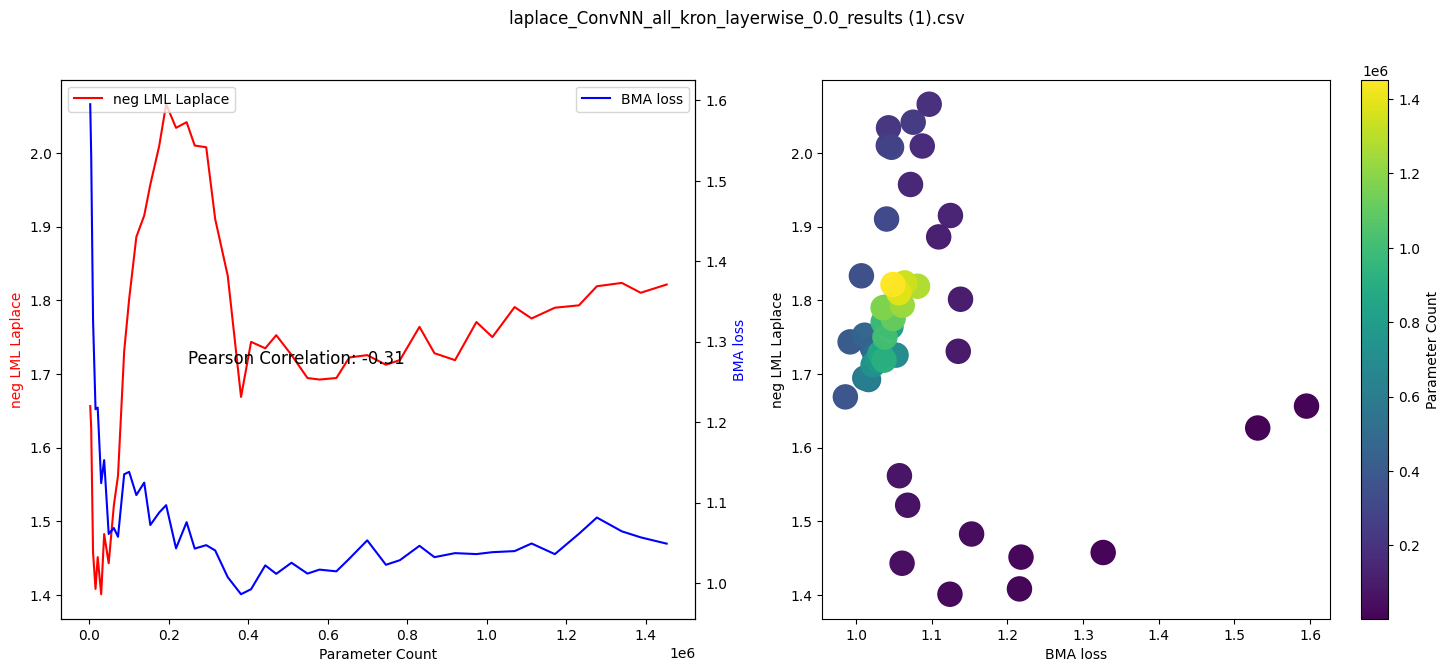

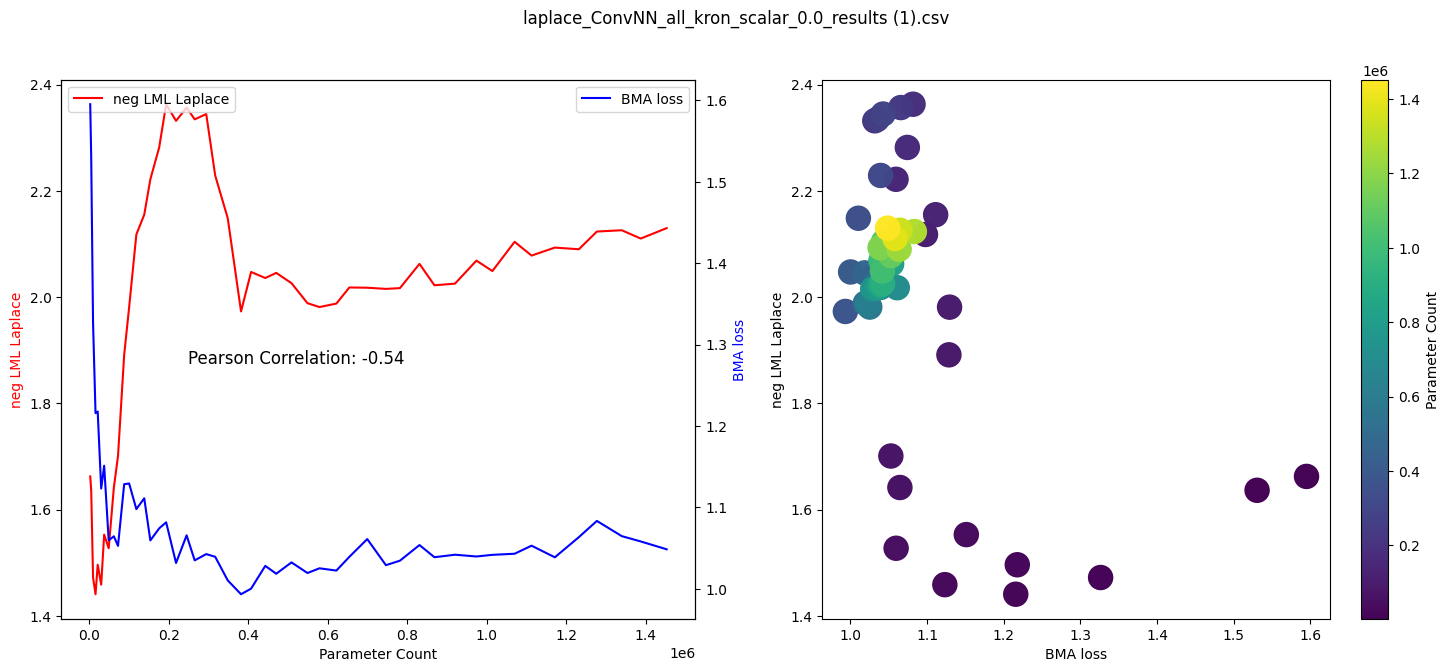

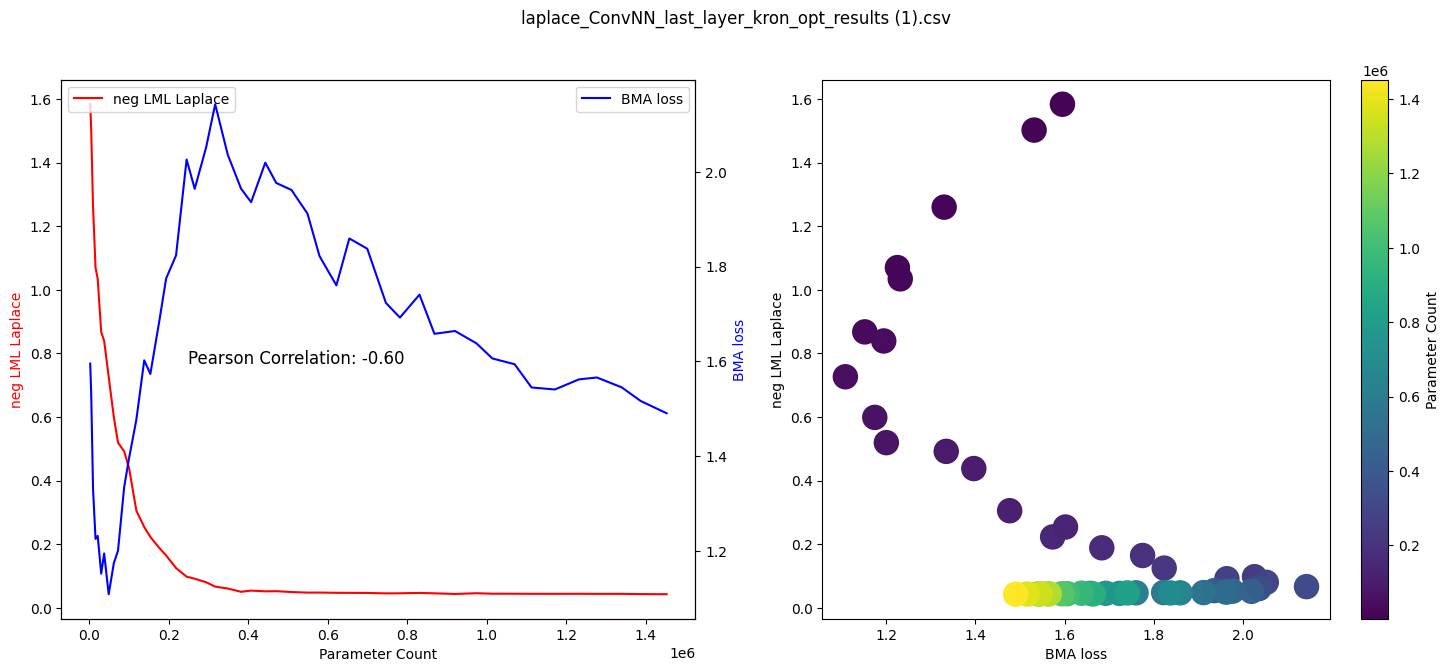

In [ ]:
x = 48
for name in uploaded:
    df = pd.read_csv(name)

    bayes_loss = df['bayes loss'].values
    neg_log_marginal_laplace = df['neg log marginal laplace'].values
    parameters = df['parameters'].values

    corr_coeff = np.corrcoef(bayes_loss[-x:], neg_log_marginal_laplace[-x:])[0, 1]

    fig, ax1 = plt.subplots(1, 2, figsize=(18, 7))

    ax2 = ax1[0].twinx()  # Crea un segundo eje para el primer gráfico

    ax1[0].plot(parameters[-x:], neg_log_marginal_laplace[-x:], label='neg LML Laplace', color='red')
    ax2.plot(parameters[-x:], bayes_loss[-x:], label='BMA loss', color='blue')

    ax1[0].set_xlabel('Parameter Count')
    ax1[0].set_ylabel('neg LML Laplace', color='red')
    ax2.set_ylabel('BMA loss', color='blue')

    ax1[0].legend(loc='upper left')
    ax2.legend(loc='upper right')

    scatter = ax1[1].scatter(bayes_loss[-x:], neg_log_marginal_laplace[-x:], c=parameters[-x:], cmap='viridis', s=300, alpha=0.99)
    ax1[1].set_xlabel('BMA loss')
    ax1[1].set_ylabel('neg LML Laplace')

    cbar = plt.colorbar(scatter, ax=ax1[1])
    cbar.set_label('Parameter Count')

    ax1[1].text(0.2, 0.5, f'Pearson Correlation: {corr_coeff:.2f}',
                transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    fig.suptitle(name)
    #fig.tight_layout()
    plt.show()


In [2]:
uploaded = files.upload()

Saving ConvNN_train_results.csv to ConvNN_train_results.csv


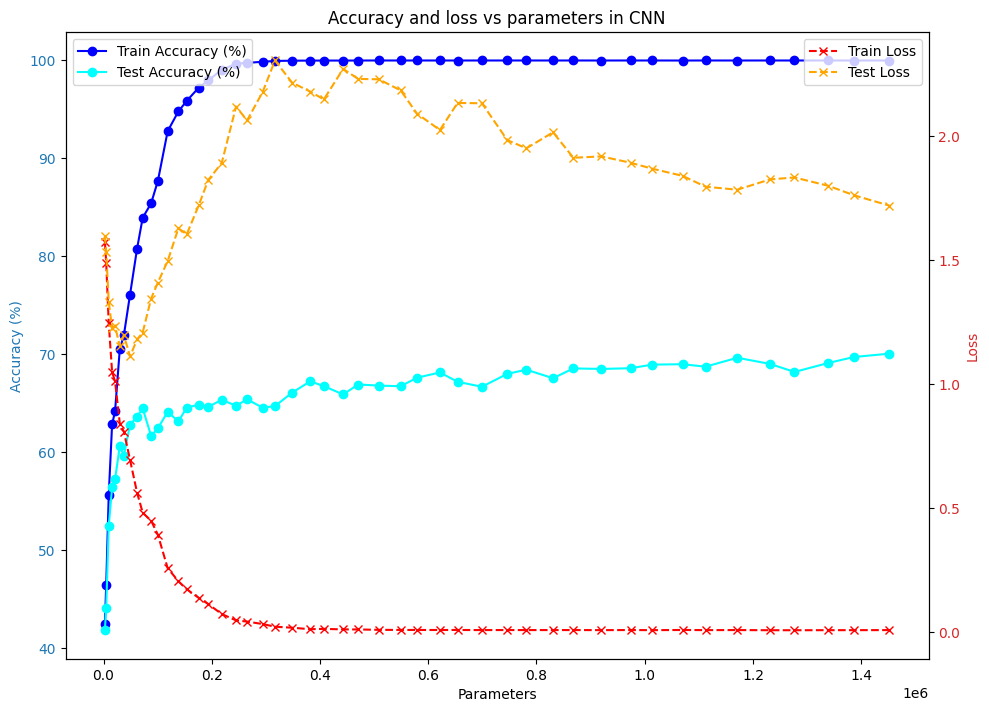

In [3]:
for name in uploaded:
  df = pd.read_csv(name)

  train_accuracy = df['train accuracy (%)'].values
  test_accuracy = df['test accuracy (%)'].values
  train_loss = df['train loss'].values
  test_loss = df['test loss'].values
  parameters = df['parameters'].values

  # Plot train/test accuracy and train/test loss again
  fig, ax1 = plt.subplots(figsize=(10, 7))

  color = 'tab:blue'
  ax1.set_xlabel('Parameters')
  ax1.set_ylabel('Accuracy (%)', color=color)
  ax1.plot(parameters, train_accuracy, label='Train Accuracy (%)', color='blue', marker='o')
  ax1.plot(parameters, test_accuracy, label='Test Accuracy (%)', color='cyan', marker='o')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.legend(loc='upper left')

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:red'
  ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
  ax2.plot(parameters, train_loss, label='Train Loss', color='red', linestyle='--', marker='x')
  ax2.plot(parameters, test_loss, label='Test Loss', color='orange', linestyle='--', marker='x')
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.legend(loc='upper right')

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.title('Accuracy and loss vs parameters in CNN')
  plt.show()